# Лабораторная работа №1.2 "Исследование эффекта Комптона"

В ходе исследования проверяется теоретическая зависимость для эффекта Комптона:
$$
\dfrac{1}{N(\theta)} - \dfrac{1}{N(0)} = A (1 - \cos \theta)
$$

Энергия вылетающих $\gamma$-квантов равна $E_\gamma = 662 \text{ кэВ}$

Из измерений можно также получить энергию покоя частиц, на которых происходило комптоновское рассеяния (в нашем случае, электронов):
$$
m c^2 = E_\gamma \dfrac{N(90)}{N(0) - N(90)}
$$

### Обработка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('raw_data.csv', delimiter=';', dtype=float)
df.head()

,angle,N,delta
0,0.0,979.0,-36.0
1,10.0,909.0,-35.0
2,20.0,774.0,-61.0
3,30.0,757.0,-70.0
4,40.0,704.0,-64.0


In [3]:
# Разберемся с погрешностями
df['err'] = np.abs(df['delta'] / df['N'])

In [4]:
def paint_dots(*args, **kwargs):
    fig, ax = plt.subplots()
    for i in args:
        x_data, y_data = i['x'], i['y']
        
        if('isScatter' in i):
            is_scatter = i['isScatter']
        else:
            is_scatter = True
        
        if('label' in i):
            label = i['label']
        else:
            label = 'Graph'
        
        if('x_label' in i):
            x_label = i['x_label']
        else:
            x_label = r'$V$, В'
        
        if('y_label' in i):
            y_label = i['y_label']
        else:
            y_label = r'$I$, мА'
            
        if('y_error' in i):
            is_scatter = False
            ax.errorbar(x_data, y_data, yerr=i['y_error'], label=label, fmt='o')
        else:
            if is_scatter:
                ax.scatter(x_data, y_data, label=label)
            else :
                ax.plot(x_data, y_data, label=label)
            
    if('x_lim' in kwargs):
        ax.set_xlim(kwargs['x_lim'])
    if('y_lim' in kwargs):
        ax.set_ylim(kwargs['y_lim'])
    if('scientific' in kwargs):
        if(kwargs['scientific']):
            import matplotlib.ticker as mtick
            ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    # Ставим title
    if('title' in kwargs):
        ax.set_title(kwargs['title'])
    else:
        ax.set_title('ВАХ')
    
    plt.subplots_adjust(bottom=.2, left=.2)
    # Сохраняем график
    if('filename' in kwargs):
        fig.savefig(kwargs['filename'])
    else:
        fig.savefig('out1.pdf')

In [5]:
x, y = (1 - np.cos(df['angle']*np.pi/180)), (1/df['N'])

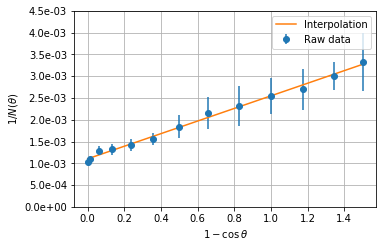

In [6]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x,y)
f = lambda x: slope*x + intercept

g = lambda theta: (slope*(1-np.cos(theta*np.pi/180)) + intercept)**(-1)


x_interp = np.linspace(np.min(x), np.max(x), 1000)
paint_dots(
    {'x': x, 'y': y, 'y_error': y*df['err'], 'label': 'Raw data'}, 
    {'x': x_interp, 'y': f(x_interp), 
     'isScatter': False, 'x_label': r'$1 - \cos\,\theta$', 
     'y_label': r'$1/N(\theta)$', 'label': 'Interpolation'},
    filename='out1.pdf', title='', y_lim=(0, 0.0045), scientific=True)

In [7]:
e_rel = std_err / np.mean(f(x_interp))

In [8]:
intercept

0.001102819600932174

По графику определяем угловой коэффициент и пересечения с осями:

In [9]:
print(r'  N(0) = {0:.0f} ± {1:.0f}'.format(g(0), g(0)*e_rel))
print(r'  N(90) = {0:.0f} ± {1:.0f}'.format(g(90), g(90)*e_rel))

  N(0) = 907 ± 15
  N(90) = 392 ± 7


### Энергия покоя электрона

In [10]:
E = 662 * g(90)/(g(0) - g(90))

In [11]:
print('  E = {0:.0f} ± {1:.0f} кэВ, теоретическое E: {2:.0f} кэВ'.format(E, E*np.sqrt(2)*e_rel, 511))
print('  Относительное расхождение: {0:.2f}%'.format(abs(E - 511)/E * 100))

  E = 504 ± 12 кэВ, теоретическое E: 511 кэВ
  Относительное расхождение: 1.29%


Данные хорошо сходятся с табличными